In [24]:
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt

import sys

sys.path.append('../scripts')

In [25]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [26]:
from elements import *

import measurement as me

### Optomechanically induced transparency (OMIT)
    In this example we show the OMIT effect. 

### Defining the OM system

In [27]:
omega_cav = 5e9*np.pi*2
kappa_0 = 0.3e6*np.pi*2
kappa_ex = 0.4e6*np.pi*2

omega_m = 5e6*np.pi*2
gamma_m = 100*np.pi*2

g_0 = 200*np.pi*2

P_in = 8e-10
Delta = -omega_m
omega_cont = omega_cav + Delta
T_cont = 1

from DCnonlinearities import optomechanics

omdir = optomechanics(P_in, kappa_0, kappa_ex, omega_cav, omega_cont, omega_m, g_0)

g= omdir['g']
omega_cav = omdir['omega_c']


a = Mode('a', omega_cav)
b = Mode('b', omega_m)

a_cont = Input('ex', a, kappa_ex, kind = 'drive', omega_drive = omega_cont, bath_temp = T_cont)
a_in0 = Input('0', a, kappa_0, kind = 'bath', bath_temp=10e-3)

b_in0 = Input('0', b, gamma_m, kind = 'bath', bath_temp=10e-3)

g_ab = Coupling(a, b, g * np.array([1,0,0,0]))

sys_om = System([a, b], [a_in0, b_in0, a_cont], [g_ab])

print ('Cooperativity C: ',4*g**2/a.kappa/gamma_m)

Cooperativity C:  1405.530153827928


In [28]:
a.omega_d + omega_m - omega_cav

61818.44487762451

### Spectrum Measurment

<IPython.core.display.Javascript object>


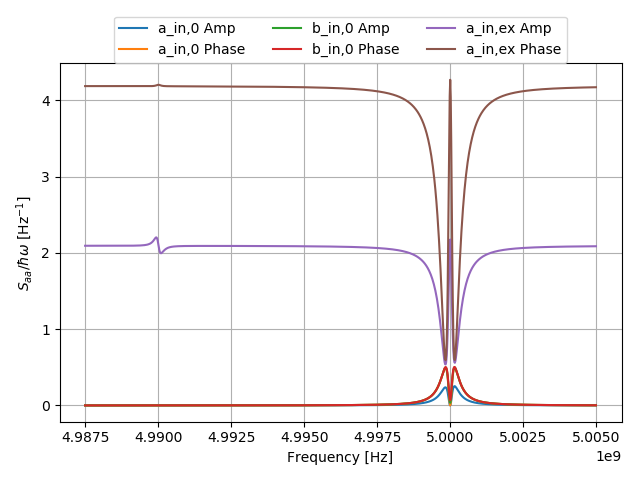

<IPython.core.display.Javascript object>


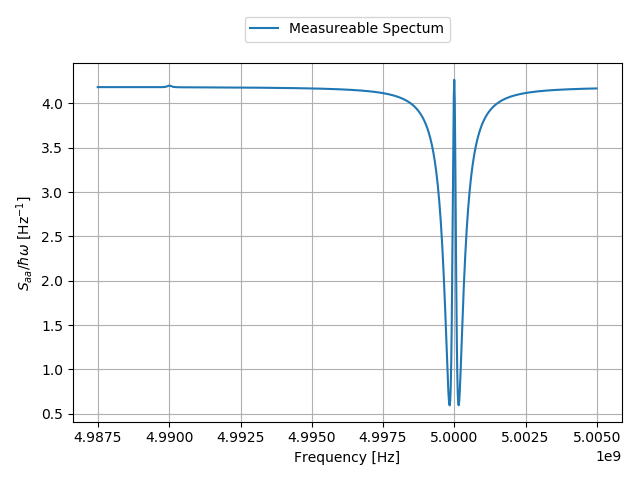

In [29]:
a_outex = Output(sys_om, a_cont)
omegas = np.linspace(omega_cav - 2.5* omega_m, omega_cav +  omega_m, 1000)
spec = me.spectrum(omegas,me.PowerMeasurement(a_outex), components=1, plot=1)

### Measuring the linear response in optical mode (transmition)

<IPython.core.display.Javascript object>


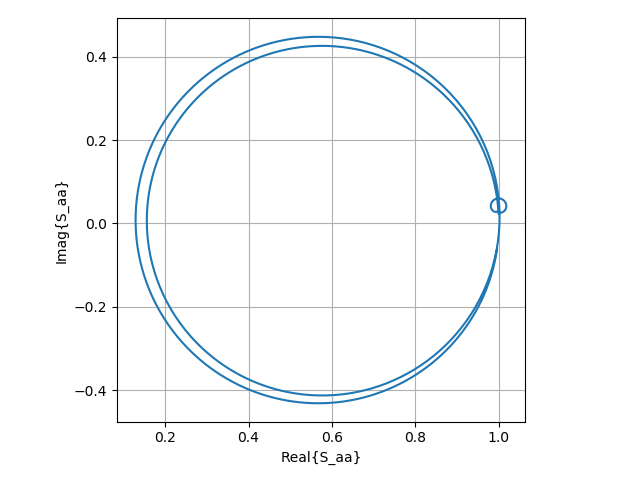

<IPython.core.display.Javascript object>


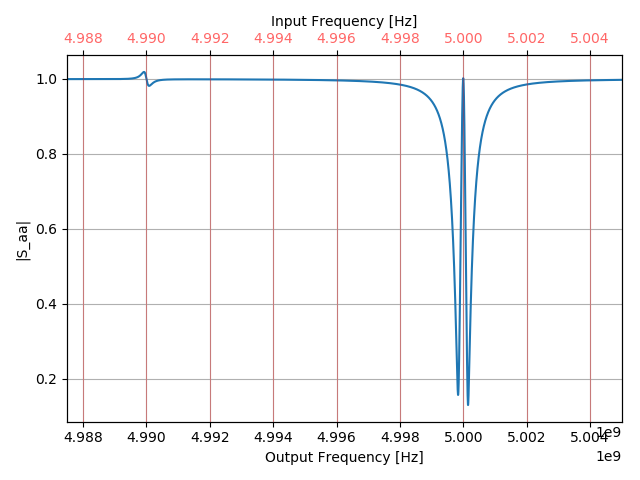

<IPython.core.display.Javascript object>


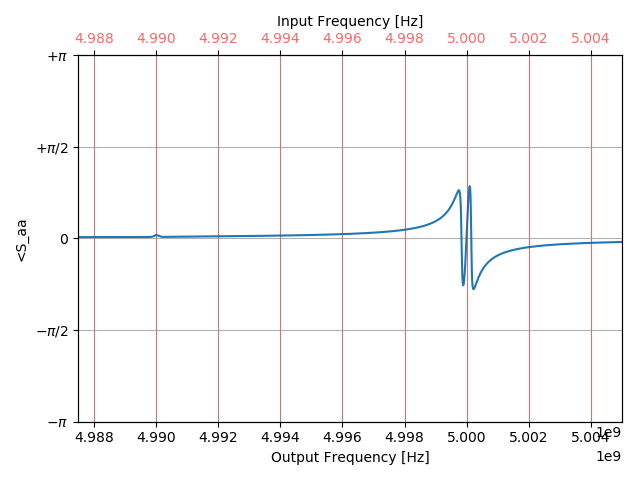

In [34]:
omegas = np.linspace(omega_cav - 2.5* omega_m, omega_cav +  omega_m, 10000)
omegas_new, A = me.linear_response(omegas, sys_om, a_outex, a_cont, plot = True)

### Measuring the linear response in mechanical mode (conversion)

<IPython.core.display.Javascript object>


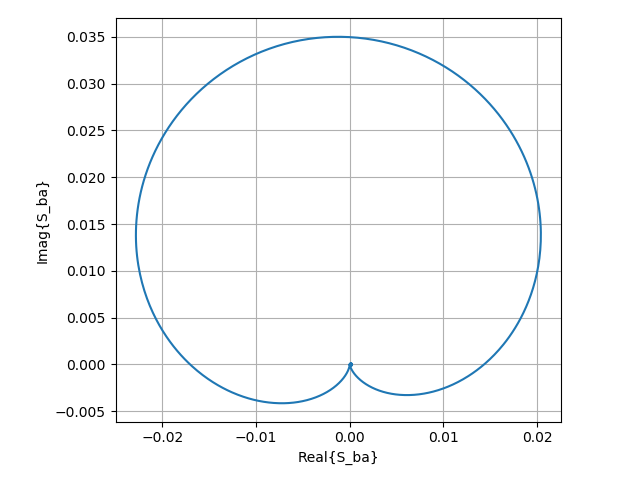

<IPython.core.display.Javascript object>


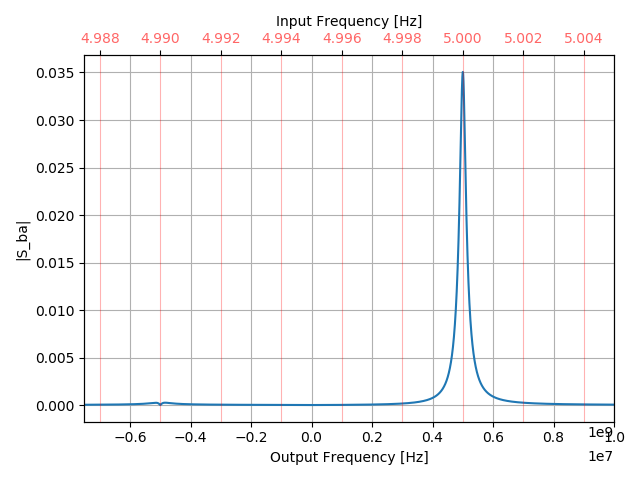

<IPython.core.display.Javascript object>


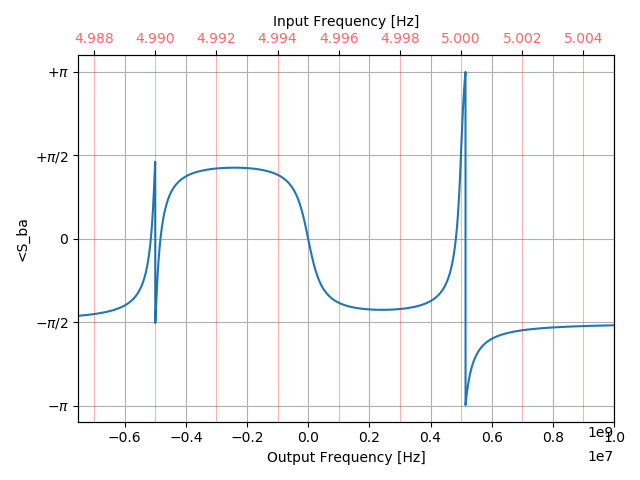

In [33]:
omegas = np.linspace(omega_cav - 2.5* omega_m, omega_cav +  omega_m, 10000)
b_out0 = Output(sys_om, b_in0)
omegas_new, A = me.linear_response(omegas, sys_om, b_out0, a_cont, plot = True)